In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('target:', wine.target)


Shape of X: (178, 13)
Shape of y: (178,)
target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
print(X.head())
print(y)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [13]:
df = X.join(pd.Series(y, name='class'))
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [23]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    s = np.zeros((13,13))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        
        s += (x - mc).dot((x - mc).T)
    
        within_class_scatter_matrix += s
within_class_scatter_matrix

array([[ 1.5661e+03, -2.1747e+02, -9.8361e+01, -6.9884e+02, -3.4322e+02,
         2.3413e+02,  2.5202e+02, -8.7897e+00,  4.7823e+01,  1.5113e+03,
         3.6474e+01, -4.1445e+01,  1.0326e+05],
       [-2.1747e+02,  3.9077e+03,  2.1451e+02,  3.4245e+03, -4.2141e+03,
        -1.3139e+02, -5.6707e+00,  9.2470e+01,  1.9494e+02, -1.0829e+03,
        -1.7454e+02,  2.7434e+02, -1.8871e+05],
       [-9.8361e+01,  2.1451e+02,  3.7991e+02,  3.0423e+03,  3.2627e+03,
         7.8215e+01,  1.3690e+02,  4.0492e+01,  5.8826e+01, -9.3399e+01,
         1.0597e+01,  7.6824e+01, -8.2537e+03],
       [-6.9884e+02,  3.4245e+03,  3.0423e+03,  5.1290e+04,  1.5304e+04,
         7.4097e+02,  1.5592e+03,  1.4699e+02,  9.5404e+02, -1.5222e+03,
         1.9302e+00,  2.1306e+03, -1.4144e+05],
       [-3.4322e+02, -4.2141e+03,  3.2627e+03,  1.5304e+04,  1.1796e+06,
         2.1477e+03,  5.6487e+02, -1.9368e+03,  8.7271e+03,  4.5693e+03,
         7.3198e+02, -2.5255e+03,  3.4961e+06],
       [ 2.3413e+02, -1.3139e+

In [34]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state = 1)

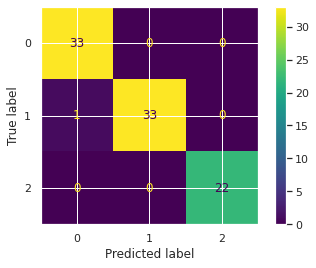

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot()

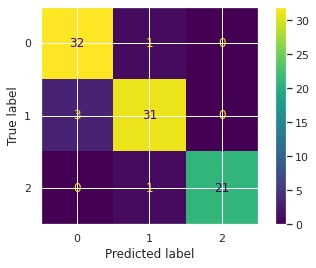

In [48]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lm.classes_)
disp.plot()